In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
import seaborn as sns

plt.style.use('dark_background')

#c_code = pd.read_excel(r"E:\Python Practies Training\Project Python\project 1\Country-Code.xlsx")
data = pd.read_csv(r"E:\Python Practies Training\Project Python\project 1\zomato.csv",encoding="ISO-8859-1")
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [2]:
data.shape


(9551, 21)

In [3]:
print(data.columns.unique())
#data.notnull().sum()
#data['Country Code'].unique()

df = data.drop(columns=['Restaurant ID','Rating text','Votes','Address','Locality'])
df.shape

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


(9551, 16)

In [4]:
# Generating Infomation about the database like
# what are my column names
# what are their data type
# checking Null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality Verbose      9551 non-null   object 
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   object 
 9   Has Table booking     9551 non-null   object 
 10  Has Online delivery   9551 non-null   object 
 11  Is delivering now     9551 non-null   object 
 12  Switch to order menu  9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

In [5]:
#checking Duplidate rows and we did not find any duplicate row.
dup_rows = df[df.duplicated()]
dup_rows
# droping duplicate values from Dataset
#df.drop_duplicates(inplace=True)  or df = df.drop_duplicates
df.shape


(9551, 16)

In [84]:
# identifing the relation between columns
# "Average Cost for two" and "Price Range" has good relation 
df.corr()*100

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating
Country Code,100.000000,-69.829916,1.979162,4.322508,24.332700,28.218877
Longitude,-69.829916,100.000000,4.320729,4.589093,-7.893860,-11.681758
Latitude,1.979162,4.320729,100.000000,-11.108783,-16.668785,0.051558
Average Cost for two,4.322508,4.589093,-11.108783,100.000000,7.508318,5.179202
Price range,24.332700,-7.893860,-16.668785,7.508318,100.000000,43.794415
Aggregate rating,28.218877,-11.681758,0.051558,5.179202,43.794415,100.000000


<AxesSubplot:>

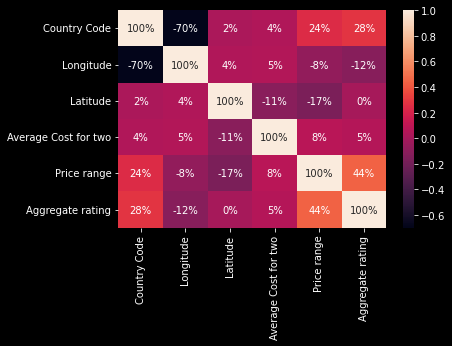

In [7]:
# By showing the Heatmap we can say that Aggregate Rating is very much correlate with Price Range as it shows 44% co related.
#it shows a possitive correlation between then.
# people spend money on food more where Aggregate rating is high.
sns.heatmap(df.corr(),annot=True,fmt="0.00%")
#sns.heatmap(df.corr(),cmap="Spectral",annot=True,fmt="0.00%")

44


[Text(0.5, 1.0, 'Spending culture on the basis of Rating')]

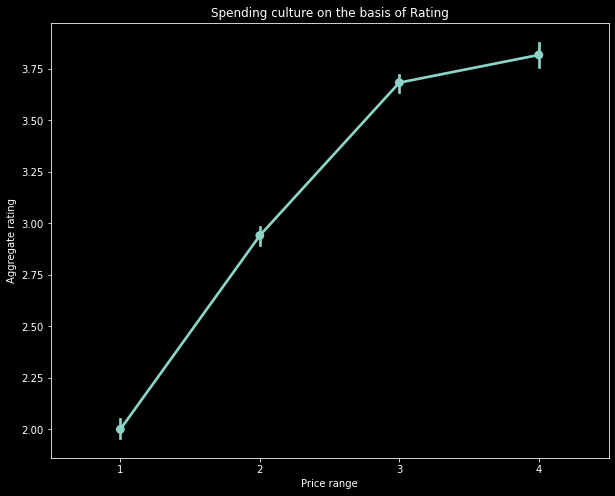

In [8]:
# we are checking the correlation of the two variable 'Price range'and 'Aggregate rating'. It shows a possitive correlation
# between then.
#in below chart people like to spend when there is a good rating of the resturant.

price_rating = df['Price range'].corr(df['Aggregate rating'])
print(round(price_rating *100))

fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Price range',y='Aggregate rating')#,hue = 'Average Cost for two')
ax.set(title="Spending culture on the basis of Rating")


[Text(0.5, 1.0, 'Spending culture on the Average Cost for two')]

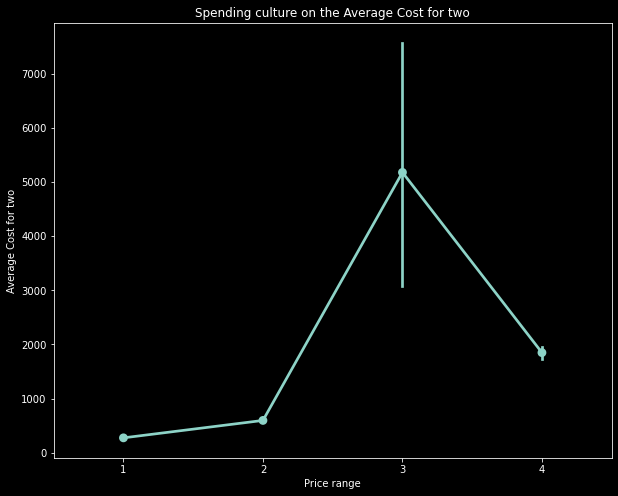

In [9]:
# Here we are seeing that "Average cost for Two" is higher in price range (3) between cost(3500 - 7000+)
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Price range',y='Average Cost for two')#,hue = 'Average Cost for two')
ax.set(title="Spending culture on the Average Cost for two")

[Text(0.5, 1.0, 'Average Cost of food goes high in price range with Good Aggregate rating')]

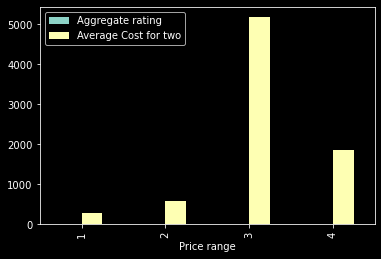

In [10]:
#when Price range is 3 and Aggregate rating is good or higer, the average cost of food goes higher.

pivot1 = pd.pivot_table(df,index = 'Price range', values=['Average Cost for two','Aggregate rating'])
pivot1.plot(kind = 'bar')
ax.set(title="Average Cost of food goes high in price range with Good Aggregate rating")


#data['Average Cost for two'].describe().min

                                  0
Has Table booking Price range      
No                1            4443
                  2            2874
                  3             764
Yes               3             644
No                4             312
Yes               4             274
                  2             239
                  1               1


<AxesSubplot:title={'center':'Table Booking Facilty'}, xlabel='Has Table booking,Price range'>

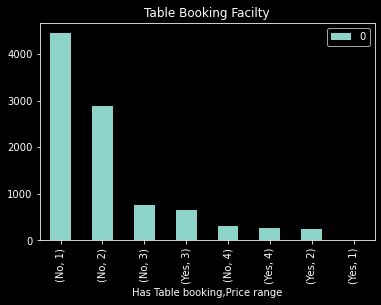

In [11]:
#df['Cuisines'].unique()
# Trend shows that people like to dine in without table booking is not available and include all the price range category

dd = pd.DataFrame(df[['Has Table booking','Price range']].value_counts())
print(dd)
#price_group = df.groupby('Has Table booking')
#price_group.get_group(Dark Green)
#price_group.max()
dd.plot(kind='bar',title = "Table Booking Facilty")


In [12]:
df.groupby(['City','Cuisines'],sort= True)['City'].max().value_counts()[0:11]
#aa.sort_values(df.groupby(['City','Cuisines'])['City'].value_counts())

New Delhi     892
Gurgaon       362
Noida         248
Faridabad      87
Ahmedabad      21
Coimbatore     20
Jaipur         20
Sharjah        20
Des Moines     20
Colombo        20
Cape Town      20
Name: City, dtype: int64

<AxesSubplot:title={'center':'Max no. of cuisines in a City'}, xlabel='City'>

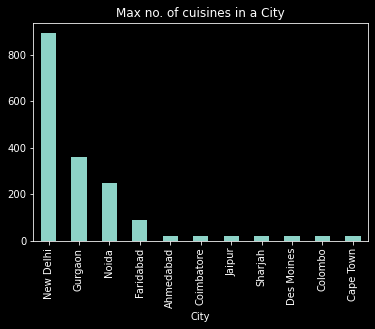

In [58]:
# Count of number of cuisines currently delivering in the a city. Below are the TOP 10 citys which are delivery maximum 
# number of cuisines.
# It shows that people like to eat different variety of food.

max_cusi_city = df.groupby(['City','Cuisines'],sort= True)['City'].max().value_counts()[0:11]
max_cusi_city.plot(kind = 'bar',xlabel= 'City', title = "Max no. of cuisines in a City")

<AxesSubplot:title={'center':'TOP 10 cuisines'}>

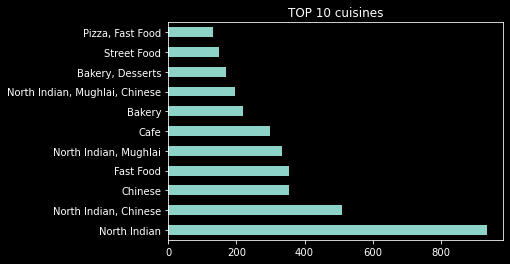

In [59]:
#Below TOp 10 cuisines people order type of food like fast food or meal.
top_10_cuisines= df['Cuisines'].value_counts()[0:11]
top_10_cuisines.plot(kind='barh', title = "TOP 10 cuisines")

<AxesSubplot:xlabel='Price range', ylabel='Density'>

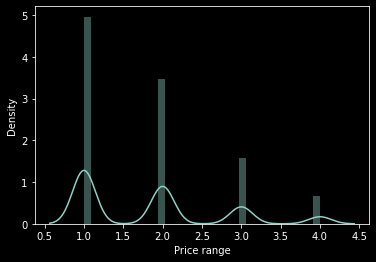

In [61]:
#it tells that most of the orders comes in Price range of 1.
sns.distplot(df['Price range'])

<AxesSubplot:xlabel='count', ylabel='Price range'>

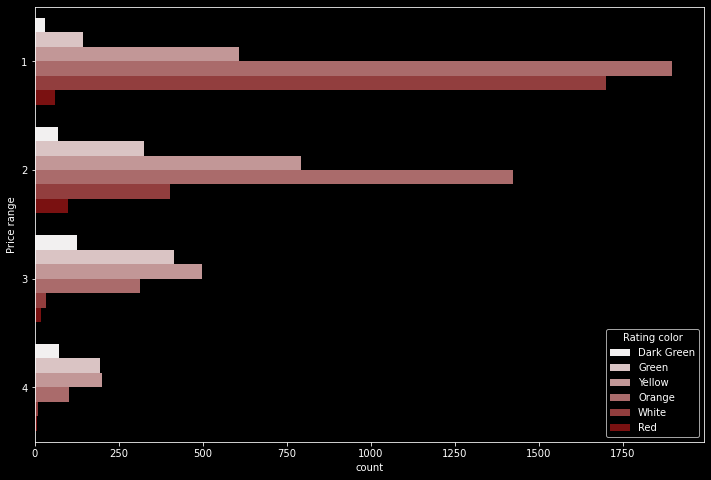

In [75]:
# if look at the Ratings in Price range 1, There are most of the ratings below satisfactry and only very less in Satisfactory .
# it also shows that as we go into higher price range, rating also improves.
#price range 4 has most satisfacotry ratings.

plt.figure(figsize=(12,8))
sns.countplot(data = df,y= 'Price range',color = 'darkred', hue='Rating color')

In [80]:
print(os.getcwd())


C:\Users\Sai
